In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nnfl-lab-1/sample_sub.csv
/kaggle/input/nnfl-lab-1/training/training/chair_875.jpg
/kaggle/input/nnfl-lab-1/training/training/chair_1119.jpg
/kaggle/input/nnfl-lab-1/training/training/chair_1246.jpg
/kaggle/input/nnfl-lab-1/training/training/kitchen_542.jpg
/kaggle/input/nnfl-lab-1/training/training/kitchen_655.jpg
/kaggle/input/nnfl-lab-1/training/training/chair_1271.jpg
/kaggle/input/nnfl-lab-1/training/training/knife_386.jpg
/kaggle/input/nnfl-lab-1/training/training/knife_905.jpg
/kaggle/input/nnfl-lab-1/training/training/kitchen_787.jpg
/kaggle/input/nnfl-lab-1/training/training/kitchen_1038.jpg
/kaggle/input/nnfl-lab-1/training/training/saucepan_1125.jpg
/kaggle/input/nnfl-lab-1/training/training/chair_279.jpg
/kaggle/input/nnfl-lab-1/training/training/kitchen_225.jpg
/kaggle/input/nnfl-lab-1/training/training/knife_343.jpg
/kaggle/input/nnfl-lab-1/training/training/knife_1005.jpg
/kaggle/input/nnfl-lab-1/training/training/knife_367.jpg
/kaggle/input/nnfl-lab-1/trai

In [2]:
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

In [3]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [4]:
filenames = os.listdir("../input/nnfl-lab-1/training/training")
categories = []
for filename in filenames:
    category = filename.split('_')[0]
    if category == 'chair':
        categories.append(0)
    elif category == 'kitchen':
        categories.append(1)
    elif category == 'knife':
        categories.append(2)
    else:
        categories.append(3)
df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [5]:
df

,filename,category
0,chair_875.jpg,0
1,chair_1119.jpg,0
2,chair_1246.jpg,0
3,kitchen_542.jpg,1
4,kitchen_655.jpg,1
...,...,...
5195,knife_487.jpg,2
5196,kitchen_1223.jpg,1
5197,knife_307.jpg,2
5198,kitchen_164.jpg,1


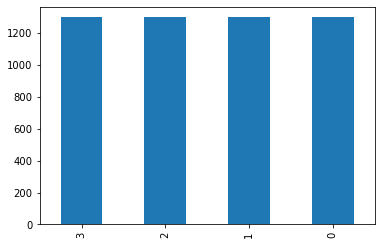

In [6]:
df['category'].value_counts().plot.bar()

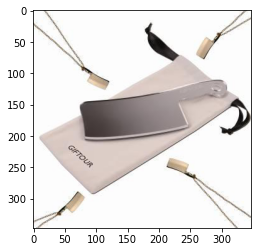

In [7]:
sample = random.choice(filenames)
image = load_img("../input/nnfl-lab-1/training/training/"+sample)
plt.imshow(image)

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax')) 

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0

In [9]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [10]:
earlystop = EarlyStopping(patience=10)

In [11]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [12]:
callbacks = [earlystop, learning_rate_reduction]

In [13]:
df['category'].head()

0    0
1    0
2    0
3    1
4    1
Name: category, dtype: int64

In [14]:
df["category"] = df["category"].replace({0: 'chair', 1: 'kitchen', 2: 'knife', 3: 'saucepan'})

In [15]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

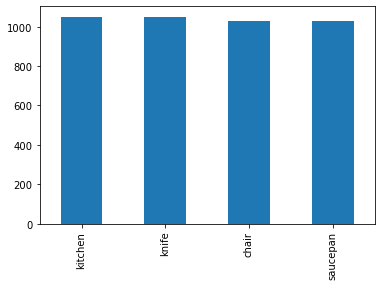

In [16]:
train_df['category'].value_counts().plot.bar()

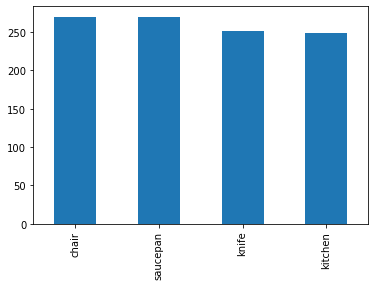

In [17]:
validate_df['category'].value_counts().plot.bar()

In [18]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

print(total_train)
print(total_validate)

4160
1040


In [19]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "../input/nnfl-lab-1/training/training/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 4160 validated image filenames belonging to 4 classes.


In [20]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "../input/nnfl-lab-1/training/training/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 1040 validated image filenames belonging to 4 classes.


In [21]:
epochs=30
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/30
175/277 [=================>............] - ETA: 37s - loss: 1.5126 - accuracy: 0.4635

/opt/conda/lib/python3.7/site-packages/PIL/Image.py:961: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


277/277 [==============================] - 120s 433ms/step - loss: 1.4372 - accuracy: 0.4893 - val_loss: 2.0867 - val_accuracy: 0.2599
Epoch 2/30
277/277 [==============================] - 113s 408ms/step - loss: 1.0746 - accuracy: 0.5901 - val_loss: 1.5972 - val_accuracy: 0.3575
Epoch 3/30
277/277 [==============================] - 111s 403ms/step - loss: 0.9013 - accuracy: 0.6519 - val_loss: 0.7101 - val_accuracy: 0.7043
Epoch 4/30
277/277 [==============================] - 111s 402ms/step - loss: 0.8037 - accuracy: 0.6876 - val_loss: 0.7927 - val_accuracy: 0.6908
Epoch 5/30
277/277 [==============================] - 112s 403ms/step - loss: 0.7237 - accuracy: 0.7324 - val_loss: 0.6541 - val_accuracy: 0.7314
Epoch 6/30
277/277 [==============================] - 112s 405ms/step - loss: 0.7154 - accuracy: 0.7408 - val_loss: 0.6800 - val_accuracy: 0.7420
Epoch 7/30
277/277 [==============================] - 111s 399ms/step - loss: 0.6604 - accuracy: 0.7549 - val_loss: 0.5514 - val_accura

In [22]:
model.save_weights("model.h5")

In [23]:
test_filenames = os.listdir("../input/nnfl-lab-1/testing/testing/")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [24]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "../input/nnfl-lab-1/testing/testing/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 1267 validated image filenames.


In [25]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

In [26]:
test_df['category'] = np.argmax(predict, axis=-1)

In [27]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

In [28]:
test_df['category'] = test_df['category'].replace({ 'chair': 0, 'kitchen': 1 ,'knife': 2, 'saucepan': 3})

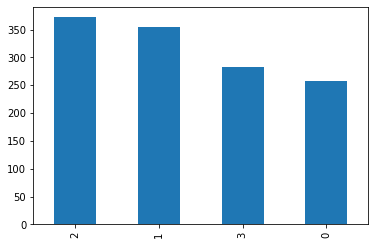

In [29]:
test_df['category'].value_counts().plot.bar()

In [30]:
submission_df = test_df.copy()
submission_df['id'] = submission_df['filename']
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
submission_df.to_csv('submission.csv', index=False)